/tmp/ipython-input-2-2292849420.py:137: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpu_labels = df.groupby("Throughput")["CPU Load"].agg(lambda x: x.value_counts().idxmax())


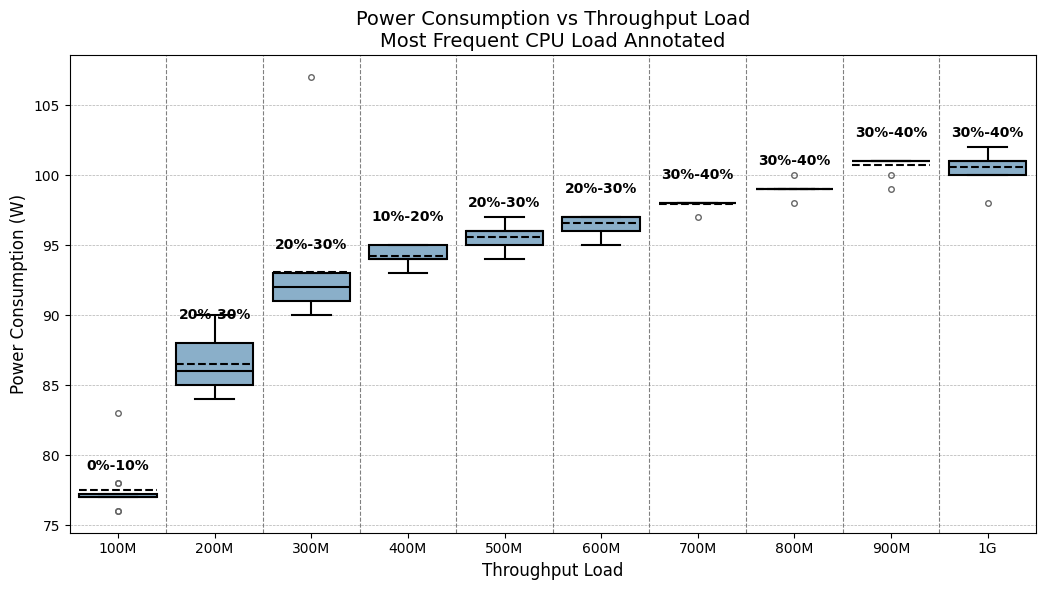

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO

# === Raw data ===
raw_input_data = """
77,[0%-10%]
77,[0%-10%]
77,[0%-10%]
77,[0%-10%]
77,[0%-10%]
77,[0%-10%]
78,[0%-10%]
78,[0%-10%]
77,[0%-10%]
76,[0%-10%]
76,[0%-10%]
83,[0%-10%]
87,[20%-30%]
86,[20%-30%]
84,[20%-30%]
85,[20%-30%]
86,[20%-30%]
85,[20%-30%]
84,[20%-30%]
86,[20%-30%]
88,[20%-30%]
89,[20%-30%]
88,[20%-30%]
90,[20%-30%]
107,[20%-30%]
91,[20%-30%]
92,[20%-30%]
91,[20%-30%]
91,[20%-30%]
91,[20%-30%]
92,[20%-30%]
93,[20%-30%]
93,[20%-30%]
93,[20%-30%]
93,[20%-30%]
90,[20%-30%]
95,[10%-20%]
94,[10%-20%]
95,[10%-20%]
94,[10%-20%]
94,[10%-20%]
95,[10%-20%]
94,[10%-20%]
94,[10%-20%]
95,[10%-20%]
94,[10%-20%]
94,[10%-20%]
93,[10%-20%]
96,[20%-30%]
96,[20%-30%]
95,[20%-30%]
96,[20%-30%]
96,[20%-30%]
97,[20%-30%]
95,[20%-30%]
96,[20%-30%]
95,[20%-30%]
95,[20%-30%]
96,[20%-30%]
94,[20%-30%]
96,[20%-30%]
97,[20%-30%]
97,[20%-30%]
97,[20%-30%]
96,[20%-30%]
97,[20%-30%]
97,[20%-30%]
97,[20%-30%]
97,[20%-30%]
96,[20%-30%]
97,[20%-30%]
95,[20%-30%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
98,[30%-40%]
97,[30%-40%]
98,[30%-40%]
99,[30%-40%]
99,[30%-40%]
99,[30%-40%]
99,[30%-40%]
99,[30%-40%]
99,[30%-40%]
99,[30%-40%]
100,[30%-40%]
99,[30%-40%]
99,[30%-40%]
99,[30%-40%]
98,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
101,[30%-40%]
100,[30%-40%]
99,[30%-40%]
101,[30%-40%]
100,[30%-40%]
100,[30%-40%]
102,[30%-40%]
102,[30%-40%]
101,[30%-40%]
101,[30%-40%]
100,[30%-40%]
100,[30%-40%]
101,[30%-40%]
98,[30%-40%]
"""

# === Data Preparation ===
df = pd.read_csv(StringIO(raw_input_data), names=["Power", "CPU Load"])
df["CPU Load"] = df["CPU Load"].str.strip("[]")

bin_labels = ["100M", "200M", "300M", "400M", "500M", "600M", "700M", "800M", "900M", "1G"]
bin_edges = np.linspace(0, len(df), num=11, dtype=int)
df["Throughput"] = pd.cut(df.index, bins=bin_edges, labels=bin_labels, include_lowest=True)
cpu_labels = df.groupby("Throughput")["CPU Load"].agg(lambda x: x.value_counts().idxmax())
uniform_color = sns.color_palette("Set3", len(bin_labels))[4]

# === Plotting ===
plt.figure(figsize=(11, 6))
sns.boxplot(
    x="Throughput",
    y="Power",
    data=df,
    color=uniform_color,
    linewidth=1.5,
    fliersize=4,
    meanline=True,
    showmeans=True,
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    meanprops=dict(color='black', linestyle='--', linewidth=1.5)
)

# Bin dividers
for i in range(1, len(bin_labels)):
    plt.axvline(i - 0.5, linestyle='--', color='gray', linewidth=0.8)

# X markers for data points
sns.stripplot(
    x="Throughput",
    y="Power",
    data=df,
    marker='x',
    size=8,
    color='black',
    alpha=0.8,
    jitter=False
)

# Adjust annotations with increased vertical padding
_, y_top = plt.ylim()
padding = 1.5  # Increase vertical distance from box plot
for i, label in enumerate(cpu_labels):
    box_data = df[df["Throughput"] == bin_labels[i]]["Power"]
    if not box_data.empty:
        y_q3 = box_data.quantile(0.75)
        y_label = min(y_q3 + padding, y_top - padding)
        plt.text(i, y_label, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Final settings
plt.title("Power Consumption vs Throughput Load\nMost Frequent CPU Load Annotated", fontsize=14)
plt.xlabel("Throughput Load", fontsize=12)
plt.ylabel("Power Consumption (W)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0.01, 0, 0.97, 1])
plt.savefig("power_vs_throughput_updated.png")
plt.show()
